In [7]:
import librosa
import matplotlib.pyplot as plt
import os
import numpy as np

In [8]:
class AudioBatchLoader:
    def __init__(self, file_paths, batch_size = 32, sr = None, duration = None):
        self.file_paths = file_paths
        self.batch_size = batch_size
        self.sr = sr
        self.duration = duration
        self.current_index = 0
    
    def __iter__(self):
        return self
    def __next__(self):
        if self.current_index >= len(self.file_paths):
            self.current_index = 0
            raise StopIteration
        batch_paths = self.file_paths[self.current_index: self.current_index + self.batch_size]
        batch_audio = []

        for path in batch_paths:
            try:
                y, sr = librosa.load(path, sr = self.sr, duration= self.duration)
                batch_audio.append((path, y , sr))
            except Exception as e:
                print(f"Error loading {path}: {e}")
        
        self.current_index += self.batch_size
        return batch_audio
    
# Step 1: Gather file paths
audio_root = 'data/train_audio/'
file_paths = []

for root, dirs, files in os.walk(audio_root):
    for file in files:
        if file.endswith('.ogg'):
            file_paths.append(os.path.join(root, file))

# Step 2: Initialize the batch loader
loader = AudioBatchLoader(file_paths, batch_size=16, sr=32000)

# Step 3: Iterate through batches



In [9]:
output_dir = "processed/raw_waveforms"
os.makedirs(output_dir, exist_ok= True)

for batch in loader:
    for path, y, sr in batch:
        file_id = os.path.splitext(os.path.basename(path))[0]

    np.savez_compressed(
        os.path.join(output_dir, f"{file_id}.npz"),
        waveform = y,
        sample_rate = sr
    )

**Summary:**
- Audio files are loaded as NumPy arrays (y) with sample rate (sr).
- Batch loading prevents RAM overflow.
- We must clean (trim, normalize) audio before feature engineering.
- Moving forward: audio cleaning, feature extraction (Mel-Spectrograms), and classification modeling will be done in next notebook!


In [12]:
npz_path = 'processed/raw_waveforms/CSA18786.npz' 

# Load the .npz file
data = np.load(npz_path)

In [13]:
# List all stored arrays
print("Keys:", data.files)

# Access waveform and sample rate
waveform = data['waveform']
sample_rate = data['sample_rate']

# Print details
print("Sample rate:", sample_rate)
print("Waveform shape:", waveform.shape)
print("Waveform preview:", waveform[:10])  # print first 10 values


Keys: ['waveform', 'sample_rate']
Sample rate: 32000
Waveform shape: (2273804,)
Waveform preview: [-1.0193788e-06  3.3618959e-05  2.1532447e-05  3.1183656e-05
  2.7172229e-05  1.3701025e-06  2.3167308e-05  3.5503654e-05
 -1.0244580e-06 -9.8002886e-07]


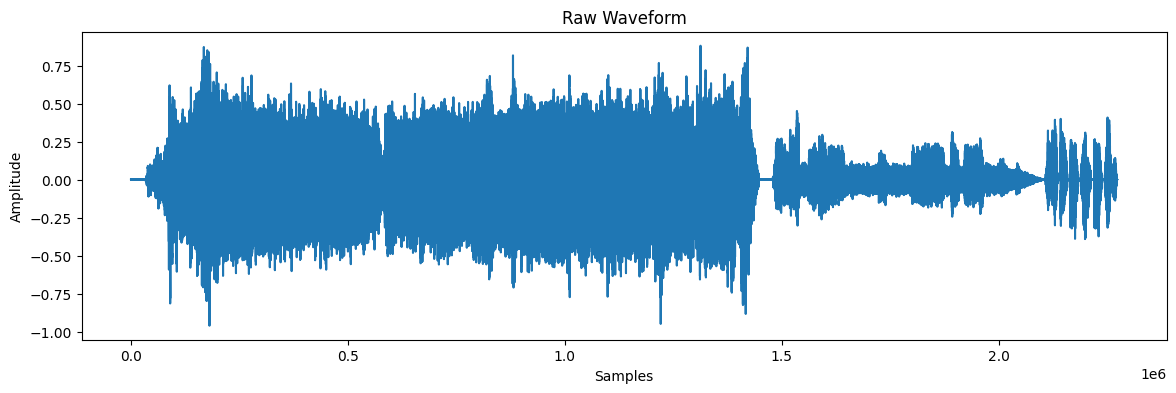

In [14]:
plt.figure(figsize=(14, 4))
plt.plot(waveform)
plt.title("Raw Waveform")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()
